# Importar bibliotecas necesarias

In [239]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Leer Geodataframe
Cargar el dataframe y usarlo para generar un geodataframe

In [240]:
csv_file = '2017_accidents_tipus_gu_bcn_.csv'
df = pd.read_csv(csv_file)
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitud, df.Latitud))
gdf

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal_caption,Descripcio_dia_setmana,Dia_setmana,...,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,geometry
0,2017S009418,-1,Desconegut,-1,Desconegut,-1,Francesc Ferrer i Guàrdia / Sant Jordi ...,Desconegut,Dilluns,Dl,...,Novembre,13,16,Tarda,Abast,428572.07,4580031.06,2.144821,41.366779,POINT (2.14482 41.36678)
1,2017S008852,-1,Desconegut,-1,Desconegut,-1,Valldaura ...,284-286,Dijous,Dj,...,Octubre,26,7,Matí,Col.lisió fronto-lateral,431806.60,4588044.41,2.182588,41.439233,POINT (2.18259 41.43923)
2,2017S001023,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,NAVAS DE TOLOSA / Av Meridiana ...,0203 0205,Dimarts,Dm,...,Febrer,7,15,Tarda,Col.lisió lateral,432116.48,4585382.72,2.186591,41.415280,POINT (2.18659 41.41528)
3,2017S009198,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant / Ruiz de Padrón ...,0090 0090,Dimarts,Dm,...,Novembre,7,14,Tarda,Col.lisió fronto-lateral,431940.75,4585401.48,2.184483,41.415436,POINT (2.18448 41.41544)
4,2017S006546,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret ...,0330 0332,Dijous,Dj,...,Juliol,27,14,Tarda,Abast,431537.32,4585363.11,2.179666,41.415060,POINT (2.17967 41.41506)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11004,2017S003667,9,Sant Andreu,59,el Bon Pastor,701266,Litoral (Llobregat) ...,140000,Dimarts,Dm,...,Abril,25,8,Matí,Col.lisió lateral,433866.55,4588278.91,2.207212,41.441509,POINT (2.20721 41.44151)
11005,2017S002192,9,Sant Andreu,59,el Bon Pastor,92938,POTOSÍ ...,0000 0000,Dissabte,Ds,...,Març,18,18,Tarda,Col.lisió fronto-lateral,433404.54,4587801.39,2.201735,41.437175,POINT (2.20174 41.43718)
11006,2017S001766,9,Sant Andreu,59,el Bon Pastor,81002,ARBECA ...,0039 0039,Divendres,Dv,...,Març,3,20,Tarda,Caiguda (dues rodes),433745.24,4587781.61,2.205818,41.437023,POINT (2.20582 41.43702)
11007,2017S009106,9,Sant Andreu,59,el Bon Pastor,295709,Sant Adrià ...,0135 0135,Dissabte,Ds,...,Novembre,4,7,Matí,Atropellament,433747.84,4587710.83,2.205850,41.436384,POINT (2.20585 41.43638)


# Calcular matriz de correlación

## Mostrar prueba de datos
Mostrar los primeros registros del geodataframe

In [241]:
gdf.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal_caption,Descripcio_dia_setmana,Dia_setmana,...,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_tipus_accident,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,geometry
0,2017S009418,-1,Desconegut,-1,Desconegut,-1,Francesc Ferrer i Guàrdia / Sant Jordi ...,Desconegut,Dilluns,Dl,...,Novembre,13,16,Tarda,Abast,428572.07,4580031.06,2.144821,41.366779,POINT (2.14482 41.36678)
1,2017S008852,-1,Desconegut,-1,Desconegut,-1,Valldaura ...,284-286,Dijous,Dj,...,Octubre,26,7,Matí,Col.lisió fronto-lateral,431806.60,4588044.41,2.182588,41.439233,POINT (2.18259 41.43923)
2,2017S001023,10,Sant Martí,64,el Camp de l'Arpa del Clot,209900,NAVAS DE TOLOSA / Av Meridiana ...,0203 0205,Dimarts,Dm,...,Febrer,7,15,Tarda,Col.lisió lateral,432116.48,4585382.72,2.186591,41.415280,POINT (2.18659 41.41528)
3,2017S009198,10,Sant Martí,64,el Camp de l'Arpa del Clot,346402,Trinxant / Ruiz de Padrón ...,0090 0090,Dimarts,Dm,...,Novembre,7,14,Tarda,Col.lisió fronto-lateral,431940.75,4585401.48,2.184483,41.415436,POINT (2.18448 41.41544)
4,2017S006546,10,Sant Martí,64,el Camp de l'Arpa del Clot,297001,Sant Antoni Maria Claret ...,0330 0332,Dijous,Dj,...,Juliol,27,14,Tarda,Abast,431537.32,4585363.11,2.179666,41.415060,POINT (2.17967 41.41506)


## Matriz de correlación
Crear una matriz de correlación a partir de un geodataframe

In [242]:
corr = gdf.corr()
corr

,Codi_districte,Codi_barri,Codi_carrer,Any,Mes_any,Dia_mes,Hora_dia,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
Codi_districte,1.000000,0.987637,0.159871,NaN,0.008895,-0.010874,-0.014116,0.440822,0.637332,0.011507,0.005310
Codi_barri,0.987637,1.000000,0.163730,NaN,0.011285,-0.012072,-0.014088,0.503770,0.611668,0.010855,0.005858
Codi_carrer,0.159871,0.163730,1.000000,NaN,0.059760,0.014360,-0.025352,0.088450,0.003130,-0.013342,0.005060
Any,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mes_any,0.008895,0.011285,0.059760,NaN,1.000000,0.020487,-0.000820,0.025905,0.000643,0.003324,0.000141
Dia_mes,-0.010874,-0.012072,0.014360,NaN,0.020487,1.000000,0.012878,-0.018346,-0.007369,-0.003306,-0.013499
Hora_dia,-0.014116,-0.014088,-0.025352,NaN,-0.000820,0.012878,1.000000,-0.004796,0.013453,0.001704,0.018309
Coordenada_UTM_X,0.440822,0.503770,0.088450,NaN,0.025905,-0.018346,-0.004796,1.000000,0.408751,-0.003007,0.009063
Coordenada_UTM_Y,0.637332,0.611668,0.003130,NaN,0.000643,-0.007369,0.013453,0.408751,1.000000,0.009872,-0.003349
Longitud,0.011507,0.010855,-0.013342,NaN,0.003324,-0.003306,0.001704,-0.003007,0.009872,1.000000,-0.000282


# Máscara del triangulo superior
Generar una máscara para el triángulo superior del mapa de calor

In [243]:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Mapa de colores divergente personalizado
Selección de paleta de colores para el mapa de calor

In [244]:
colorMap = sns.diverging_palette(220, 10, as_cmap=True)

# Mapa de calor con máscara y relación de aspecto correcta
Generar mapa de calor usando la matriz de correlación y la máscara para el triángulo superior que creamos anteriormente

<AxesSubplot:>

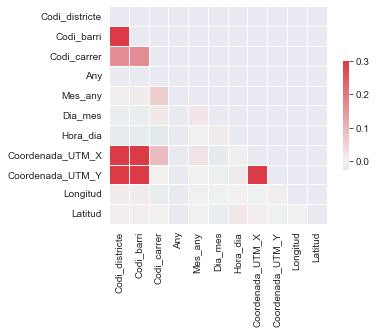

In [245]:
sns.heatmap(corr, mask=mask, cmap=colorMap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Comprobar nombres de los campos del geoframe
Mostrar columnas del geodataframe

In [246]:
gdf.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal_caption',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Any',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Descripcio_tipus_accident', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud', 'geometry'],
      dtype='object')

# Importar API Statsmodel

In [247]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Modelo ajustado en una línea

## Crear un dataset a partir de el geodataset principal

Seleccionar columnas a usar

In [ ]:
X = gdf[['Codi_carrer']]
y = gdf['Codi_districte']

Realizar la separación del geodataset y crear un dataset de entrenamiento

In [249]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
data_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['Codi_carrer','Codi_districte'])

## Creación y manipulación del modelo de regresión lineal

Creación del modelo de regresión lineal y ajuste del modelo

In [250]:
X_train = sm.add_constant(X_train, prepend=True)
lm = sm.OLS(endog=y_train, exog=X_train,)
lm = lm.fit()

Mostrar parámetros

In [251]:
lm.params

array([4.21924920e+00, 2.65656975e-06])

Imprimir resultados de la creación de la regresión lineal

In [252]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     255.4
Date:                Sun, 08 May 2022   Prob (F-statistic):           1.06e-56
Time:                        13:54:22   Log-Likelihood:                -22123.
No. Observations:                8807   AIC:                         4.425e+04
Df Residuals:                    8805   BIC:                         4.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2192      0.051     83.354      0.0

Impresión de coeficientes de regresión

In [253]:
lm.conf_int(alpha=0.05)

array([[4.12002550e+00, 4.31847290e+00],
       [2.33074114e-06, 2.98239835e-06]])

Almacenar y mostrar los datos de la predicción

In [254]:
predicciones = lm.get_prediction(exog= X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.603392,0.035306,4.534184,4.672600,-1.245706,10.452490
1,4.872239,0.031827,4.809850,4.934628,-0.976782,10.721260
2,4.647225,0.034203,4.580180,4.714270,-1.201847,10.496298
3,5.182527,0.038039,5.107962,5.257092,-0.666637,11.031690


Crear predicción y almacenar datos ordenados

In [255]:
predicciones = lm.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

Mostrar un gráfico lineal con los datos de la predicción

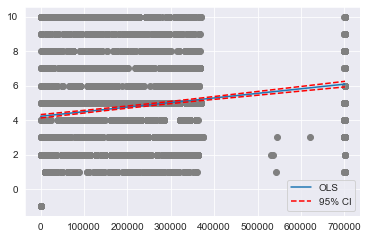

In [256]:
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

Obtener e imprimir error cuadrático medio

In [257]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = lm.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 2.9421364260943372
